In [1]:
import numpy as np
import pandas as pd

from structures import *
from averager import *

# Ввод-вывод файла

В данном примере считывание производится из .csv-файла.

In [2]:
with open("myfile.csv") as file:
    data = StreamData(file.read(), 501, 981)

print(data.dataset)

             X     Y  Z  X Velocity  Y Velocity  Z Velocity  Unnamed: 6
0      -0.1250  0.00  0    0.000524    0.063100    0.000119         NaN
1      -0.1245  0.00  0    0.001133    0.159946    0.000207         NaN
2      -0.1240  0.00  0    0.002006    0.188397    0.000222         NaN
3      -0.1235  0.00  0    0.002408    0.191553    0.000225         NaN
4      -0.1230  0.00  0    0.002490    0.191796    0.000225         NaN
...        ...   ... ..         ...         ...         ...         ...
491476  0.1230  0.49  0   -0.004967   -0.238701    0.045147         NaN
491477  0.1235  0.49  0   -0.004193   -0.228045    0.043539         NaN
491478  0.1240  0.49  0   -0.002693   -0.196214    0.038637         NaN
491479  0.1245  0.49  0   -0.001164   -0.133619    0.022871         NaN
491480  0.1250  0.49  0   -0.000221   -0.043466    0.004108         NaN

[491481 rows x 7 columns]


# Осреднение

Создаем три временных списка, получая и преобразуя соотвествующие столбцы датасета

In [3]:
tmplistX = advance_to_column(data, "X Velocity")
tmplistY = advance_to_column(data, "Y Velocity")
tmplistZ = advance_to_column(data, "Z Velocity")

Функция возвращающая модуль трех введенных полей:

In [4]:
def Calculate_module_of_arrays(our_fields: list) -> list:
    module_of_fields = [[float(0) for y in range(len(our_fields[0][0]))] for x in range(len(our_fields[0]))]
    for i in range(len(our_fields[0])):
        for j in range(len(our_fields[0][0])):
            module_of_fields[i][j] = (our_fields[0][i][j]**2 + our_fields[1][i][j]**2 + our_fields[2][i][j]**2)**0.5
    return module_of_fields

Функция для построения графиков в одну картинку, сколько введено столько и построит:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_figures_in_row(figures, titles=None, xlabels=None, ylabels=None, show_axes=True, show_colorbar=False, figsize=(6, 6), subplot_widths=None, font_size=12, nrows=1):
    # Determine the number of figures in the list
    num_figures = len(figures)

    # Determine the number of rows and columns of subplots
    ncols = num_figures // nrows
    if num_figures % nrows > 0:
        ncols += 1

    # Create a new figure with a specified size and subplot layout
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    # Set font size for all elements in the figure
    plt.rcParams.update({'font.size': font_size})

    # Add each figure to a subplot
    for i in range(num_figures):
        row = i // ncols
        col = i % ncols
        if show_axes:
            im = axs[row, col].imshow(figures[i], cmap='viridis')
        else:
            im = axs[row, col].imshow(figures[i], cmap='viridis', interpolation='nearest')
            axs[row, col].set_axis_off()
        if titles is not None:
            axs[row, col].set_title(titles[i])
        if xlabels is not None:
            axs[row, col].set_xlabel(xlabels[i])
        if ylabels is not None:
            axs[row, col].set_ylabel(ylabels[i])
        if show_colorbar:
            fig.colorbar(im, ax=axs[row, col])

    # Adjust the spacing between subplots and show the figure
    plt.subplots_adjust(wspace=0.1)
    plt.subplots_adjust(hspace=0.1)
    plt.show()

# Set the size of the figure
figsize = (8, 12)

# Remove the axes from the subplots
show_axes = False

# Add a color bar to the subplots
show_colorbar = True

# Set the width ratio of each subplot
subplot_widths = [4, 4, 4, 4]

# Set the font size for all text elements
font_size = 10

Делаем 100 итераций осреднения на `tmplistX` с радиусом 2

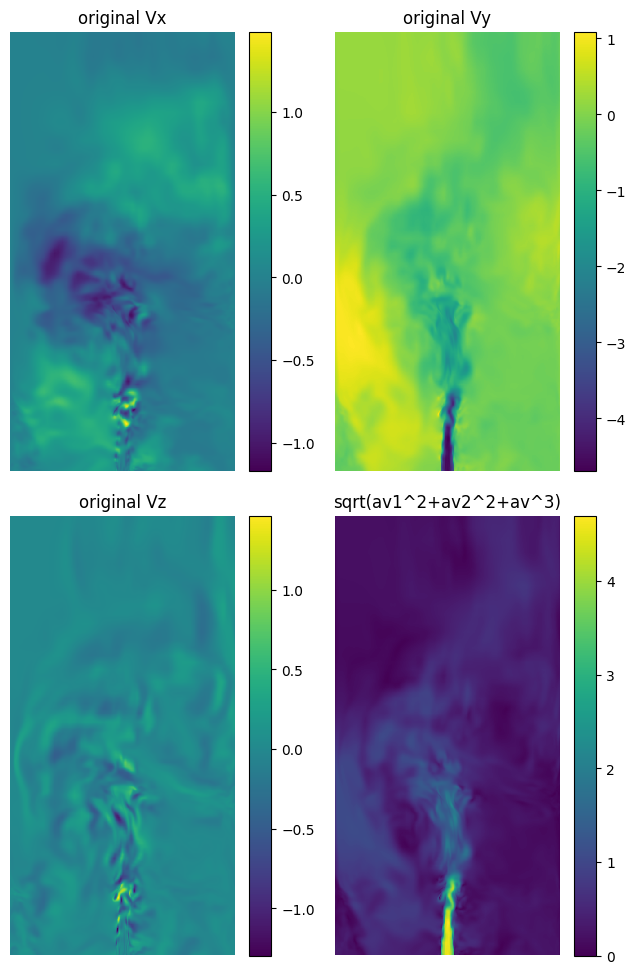

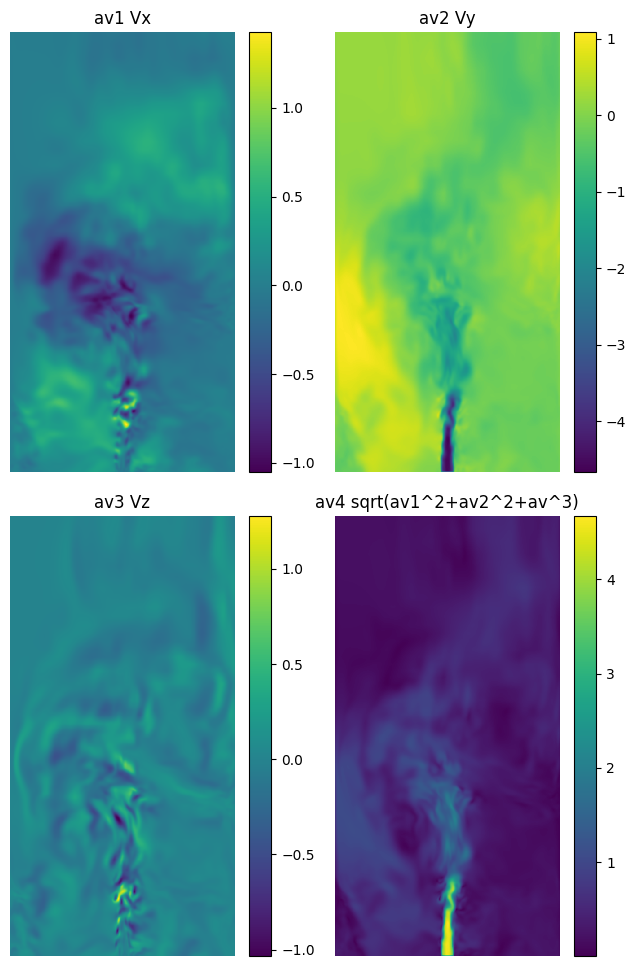

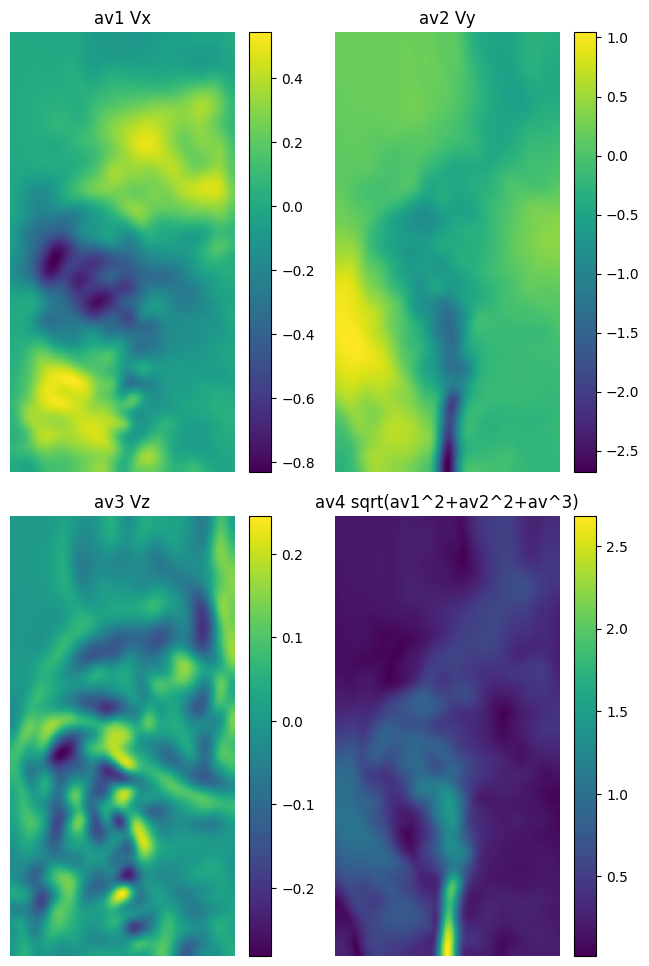

In [7]:
all_coord_mod = Calculate_module_of_arrays((tmplistX, tmplistY, tmplistZ))

graphics = []
graphics.append(tmplistX)
graphics.append(tmplistY)
graphics.append(tmplistZ)
graphics.append(all_coord_mod)

titles = ["original Vx", "original Vy", "original Vz", "sqrt(av1^2+av2^2+av^3)"]

plot_figures_in_row(graphics, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, nrows=2)

av1 = basic_2d_array_averaging(tmplistX, 2)
av2 = basic_2d_array_averaging(tmplistY, 2)
av3 = basic_2d_array_averaging(tmplistZ, 2)
all_coord_mod = Calculate_module_of_arrays((av1, av2, av3))

graphics = []
graphics.append(av1)
graphics.append(av2)
graphics.append(av3)
graphics.append(all_coord_mod)

titles = ["av1 Vx", "av2 Vy", "av3 Vz", "av4 sqrt(av1^2+av2^2+av^3)"]

plot_figures_in_row(graphics, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, nrows=2)

for i in range(100):
    av1 = basic_2d_array_averaging(av1, 2)
    av2 = basic_2d_array_averaging(av2, 2)
    av3 = basic_2d_array_averaging(av3, 2)
all_coord_mod = Calculate_module_of_arrays((av1, av2, av3))

titles = ["final av1 Vx", "final av2 Vy", "final av3 Vz", "final av4 sqrt(av1^2+av2^2+av^3)"]

graphics = []
graphics.append(av1)
graphics.append(av2)
graphics.append(av3)
graphics.append(all_coord_mod)

plot_figures_in_row(graphics, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, nrows=2)